<a href="https://colab.research.google.com/github/Precillieo/Financial-Model/blob/main/Final_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
!pip install lightgbm
!pip install xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
train= pd.read_excel('/content/drive/MyDrive/Mr Olowe/final dataset.xlsx')
val= pd.read_excel('/content/drive/MyDrive/Mr Olowe/Final Test Data.xlsx')
test= pd.read_excel('/content/drive/MyDrive/Mr Olowe/Final Test Data.xlsx')
train.head()

,id,loan_amount,interest_due,tenor,interest_rate,card_network,card_expiry,bank,phone_network,date_of_birth,tier,selfie_id_check,gender,marital_status,no_of_dependent,type_of_residence,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,address,requested_amount,purpose,proposed_payday,credit_score,location,failed_requests,passed_requests,all_requests,logins,phone_numbers,emails,lenders,first_account,last_account,lending_lenders,loans,status
0,9,288.88,72.22,15 days,25.0,Visa,NaN,NaN,803,1991-06-25,Tier 1,Successful,Female,Single,0,Own House,MSc and Above,Private Company,Agriculture,"Above 200,000",2020-06-02 01:00:00,0,Lagos,288.88,Asset Purchase,15 days,78.43,lagos,2,2,4,5,1,3,4,2020-05-30 08:46:15,2020-08-06 19:15:28,3,21,SETTLED
1,11,100.00,25.00,15 days,25.0,Visa,NaN,NaN,803,1991-06-25,Tier 1,Successful,Female,Single,0,Rented Apartment,MSc and Above,Private Company,Other Financial,"Above 200,000",2018-05-15 00:00:00,0,Lagos,100.00,Travel,15 days,82.35,lagos,2,3,5,6,1,3,4,2020-05-30 08:46:15,2020-08-06 19:15:28,3,21,SETTLED
2,13,100.00,25.00,15 days,25.0,Visa,NaN,NaN,803,1991-06-25,Tier 1,Successful,Female,Single,0,Rented Apartment,MSc and Above,Private Company,Other Financial,"Above 200,000",2018-05-15 00:00:00,0,Lagos,100.00,Travel,15 days,82.35,lagos,2,4,6,7,1,3,4,2020-05-30 08:46:15,2020-08-06 19:15:28,3,21,SETTLED
3,29,1000.00,250.00,30 days,25.0,Visa,72021.0,Access Bank,803,1989-03-14,Tier 1,Pending,Male,Single,0,Rented Apartment,"BSc, HND and Other Equivalent",Private Company,Telecoms,"Above 200,000",2018-02-19 00:00:00,0,Akin Joe Busstop Satelite Town lagos,1000.00,Rent,30 days,86.27,lagos,2,1,3,5,1,1,1,2020-06-14 13:42:10,2020-06-14 13:42:10,1,1,SETTLED
4,37,1000.00,250.00,15 days,25.0,Mastercard,102021.0,United Bank for Africa,703,1991-01-31,Tier 1,Pending,Female,Single,0,Rented Apartment,MSc and Above,Private Company,Other Financial,"Above 200,000",2019-07-18 01:00:00,0,Lekki,1000.00,Others,15 days,82.35,lagos,0,1,1,7,1,1,1,2020-06-13 11:29:13,2020-06-13 11:29:13,1,1,SETTLED


In [3]:
print(val.shape)
print(train.shape)

(2500, 40)
(2500, 40)


In [4]:
train.status.value_counts()

SETTLED     1511
PAST DUE     989
Name: status, dtype: int64

# Visualizing The Target Value


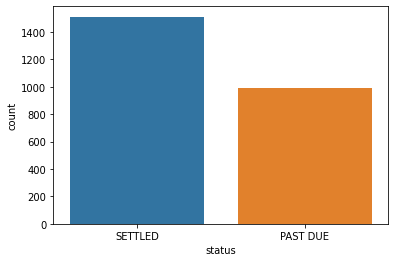

In [5]:
import seaborn as sns
sns.countplot(x= train['status'])

# Filling Missing Values

In [6]:
train.dtypes

id                                 int64
loan_amount                      float64
interest_due                     float64
tenor                             object
interest_rate                    float64
card_network                      object
card_expiry                      float64
bank                              object
phone_network                      int64
date_of_birth             datetime64[ns]
tier                              object
selfie_id_check                   object
gender                            object
marital_status                    object
no_of_dependent                   object
type_of_residence                 object
educational_attainment            object
employment_status                 object
sector_of_employment              object
monthly_net_income                object
work_start_date           datetime64[ns]
work_email_validated               int64
address                           object
requested_amount                 float64
purpose         

In [7]:
train.isnull().sum()

id                           0
loan_amount                  0
interest_due                 0
tenor                        0
interest_rate               23
card_network                 0
card_expiry                 69
bank                        69
phone_network                0
date_of_birth                0
tier                         0
selfie_id_check              0
gender                    1940
marital_status               0
no_of_dependent              0
type_of_residence         1940
educational_attainment       0
employment_status            0
sector_of_employment         0
monthly_net_income           0
work_start_date              1
work_email_validated         0
address                   1940
requested_amount             0
purpose                      0
proposed_payday              0
credit_score                 0
location                     0
failed_requests              0
passed_requests              0
all_requests                 0
logins                       0
phone_nu

In [8]:
train.gender.value_counts(dropna=False)

NaN       1940
Male       409
Female     151
Name: gender, dtype: int64

In [9]:
train[~train.gender.isna()].status.value_counts()

PAST DUE    308
SETTLED     252
Name: status, dtype: int64

In [10]:
train.drop(['id','gender', 'type_of_residence', 'address'], 1, inplace=True)
train.columns

Index(['loan_amount', 'interest_due', 'tenor', 'interest_rate', 'card_network',
       'card_expiry', 'bank', 'phone_network', 'date_of_birth', 'tier',
       'selfie_id_check', 'marital_status', 'no_of_dependent',
       'educational_attainment', 'employment_status', 'sector_of_employment',
       'monthly_net_income', 'work_start_date', 'work_email_validated',
       'requested_amount', 'purpose', 'proposed_payday', 'credit_score',
       'location', 'failed_requests', 'passed_requests', 'all_requests',
       'logins', 'phone_numbers', 'emails', 'lenders', 'first_account',
       'last_account', 'lending_lenders', 'loans', 'status'],
      dtype='object')

In [11]:
train.interest_rate.value_counts()

25.20    279
35.49    109
15.00    104
19.99     56
11.33     47
        ... 
7.94       1
15.59      1
7.90       1
17.12      1
17.35      1
Name: interest_rate, Length: 371, dtype: int64

In [12]:
train.loc[train.interest_rate.isna()]

,loan_amount,interest_due,tenor,interest_rate,card_network,card_expiry,bank,phone_network,date_of_birth,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location,failed_requests,passed_requests,all_requests,logins,phone_numbers,emails,lenders,first_account,last_account,lending_lenders,loans,status
28,3000.0,750.0,21 days,NaN,Mastercard,122021.0,United Bank for Africa,814,1994-10-04,Tier 1,Successful,Single,0,"BSc, HND and Other Equivalent",Private Company,Banking,"Above 200,000",2018-08-15 01:00:00,1,3000.0,Medical,15 days,79.45,lagos,1,2,3,8,1,1,4,2020-06-11 00:47:19,2020-08-30 23:28:38,3,10,SETTLED
29,3000.0,810.0,14 days,NaN,Mastercard,22022.0,Guaranty Trust Bank,703,1993-05-23,Tier 1,Successful,Single,0,"BSc, HND and Other Equivalent",Private Company,Other Financial,"Above 200,000",2018-11-01 01:00:00,0,3000.0,Holiday,15 days,78.74,lagos,147,24,171,57,1,1,5,2020-05-27 19:19:18,2020-09-24 21:39:02,3,30,SETTLED
31,2500.0,125.0,1 days,NaN,Mastercard,22023.0,Guaranty Trust Bank,816,1993-10-12,Tier 1,Pending,Single,0,MSc and Above,Enterprise,Agriculture,"Above 200,000",2005-08-17 00:00:00,1,500.0,Personal,15 days,76.31,lagos,9,1,10,9,2,2,6,2020-05-17 20:38:35,2021-01-12 11:12:32,3,6,SETTLED
32,2500.0,125.0,1 days,NaN,Mastercard,72022.0,Guaranty Trust Bank,706,1995-09-20,Tier 1,Pending,Single,0,"BSc, HND and Other Equivalent",Private Company,Banking,"Above 200,000",2018-08-17 01:00:00,0,2500.0,Holiday,15 days,77.88,lagos,10,1,11,3,1,2,4,2020-06-05 09:08:59,2020-08-07 20:13:17,2,3,SETTLED
33,2500.0,125.0,1 days,NaN,Mastercard,122021.0,United Bank for Africa,814,1994-10-04,Tier 1,Successful,Single,0,"BSc, HND and Other Equivalent",Private Company,Banking,"Above 200,000",2018-08-15 01:00:00,0,2500.0,Medical,15 days,83.45,lagos,1,4,5,11,1,1,4,2020-06-11 00:47:19,2020-08-30 23:28:38,3,10,SETTLED
34,2500.0,125.0,1 days,NaN,Mastercard,72022.0,Guaranty Trust Bank,706,1995-09-20,Tier 1,Pending,Single,0,"BSc, HND and Other Equivalent",Private Company,Banking,"Above 200,000",2018-08-17 01:00:00,0,3000.0,Holiday,30 days,77.88,lagos,21,2,23,4,1,2,4,2020-06-05 09:08:59,2020-08-07 20:13:17,2,3,SETTLED
35,2500.0,125.0,1 days,NaN,Mastercard,22022.0,Guaranty Trust Bank,703,1993-05-23,Tier 1,Successful,Single,0,"BSc, HND and Other Equivalent",Private Company,Other Financial,"Above 200,000",2018-11-01 01:00:00,0,2500.0,Holiday,15 days,78.74,lagos,162,27,189,62,1,1,5,2020-05-27 19:19:18,2020-09-24 21:39:02,3,30,SETTLED
36,2500.0,125.0,1 days,NaN,Mastercard,122021.0,United Bank for Africa,814,1994-10-04,Tier 1,Successful,Single,0,"BSc, HND and Other Equivalent",Private Company,Banking,"Above 200,000",2018-08-15 01:00:00,0,2500.0,Medical,15 days,79.45,lagos,3,5,8,13,1,1,4,2020-06-11 00:47:19,2020-08-30 23:28:38,3,10,SETTLED
40,2500.0,675.0,14 days,NaN,Mastercard,12023.0,Guaranty Trust Bank,806,1988-07-15,Tier 1,Pending,Single,0,MSc and Above,Private Company,Manufacturing and Construction,"100,000 - 200,000",2016-01-10 00:00:00,0,2500.0,Personal,15 days,75.61,lagos,1,1,2,1,1,1,1,2020-06-09 13:47:15,2020-06-09 13:47:15,1,2,SETTLED
41,2500.0,125.0,1 days,NaN,Mastercard,12023.0,Guaranty Trust Bank,806,1988-07-15,Tier 1,Pending,Single,0,MSc and Above,Private Company,Manufacturing and Construction,"100,000 - 200,000",2016-01-10 00:00:00,0,2500.0,Personal,15 days,71.61,lagos,2,2,4,2,1,1,1,2020-06-09 13:47:15,2020-06-09 13:47:15,1,2,SETTLED


Every single one of them is ```settled```



The formula for interest due is:

***
$InterestDue = \frac{InterestRate * LoanAmount}{100}$
***
We could make `interest_rate` the subject of the formula:

*** 
$InterestRate = \frac{InterestDue * 100}{LoanAmount}$

In [13]:
train.loc[train.interest_rate.isna(), 'interest_rate'] = (train.interest_due * 100) / train.loan_amount

train.loc[train.interest_rate.isna()]

,loan_amount,interest_due,tenor,interest_rate,card_network,card_expiry,bank,phone_network,date_of_birth,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location,failed_requests,passed_requests,all_requests,logins,phone_numbers,emails,lenders,first_account,last_account,lending_lenders,loans,status


# Card Expiry Column

In [14]:
train.card_expiry.value_counts()

22023.0     152
32023.0     139
82023.0     130
92023.0     125
72023.0     112
12023.0      92
122022.0     89
102023.0     85
92022.0      83
22022.0      82
82022.0      77
102022.0     75
12022.0      70
72022.0      67
62022.0      66
112022.0     65
122021.0     63
52023.0      60
42022.0      59
62023.0      59
32022.0      55
82021.0      51
52022.0      48
112021.0     48
112023.0     45
102021.0     41
92021.0      40
52021.0      33
72021.0      32
122023.0     29
42021.0      27
62021.0      26
42023.0      26
82024.0      23
102024.0     20
52024.0      19
32021.0      17
22024.0      14
72024.0      13
92024.0      13
12021.0      12
62024.0      11
12024.0      10
32024.0      10
42024.0       8
102020.0      3
22021.0       3
112024.0      2
122024.0      1
112020.0      1
Name: card_expiry, dtype: int64

In [15]:
train[train.card_expiry.isna()]

,loan_amount,interest_due,tenor,interest_rate,card_network,card_expiry,bank,phone_network,date_of_birth,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location,failed_requests,passed_requests,all_requests,logins,phone_numbers,emails,lenders,first_account,last_account,lending_lenders,loans,status
0,288.88,72.22,15 days,25.00,Visa,NaN,NaN,803,1991-06-25,Tier 1,Successful,Single,0,MSc and Above,Private Company,Agriculture,"Above 200,000",2020-06-02 01:00:00,0,288.88,Asset Purchase,15 days,78.43,lagos,2,2,4,5,1,3,4,2020-05-30 08:46:15,2020-08-06 19:15:28,3,21,SETTLED
1,100.00,25.00,15 days,25.00,Visa,NaN,NaN,803,1991-06-25,Tier 1,Successful,Single,0,MSc and Above,Private Company,Other Financial,"Above 200,000",2018-05-15 00:00:00,0,100.00,Travel,15 days,82.35,lagos,2,3,5,6,1,3,4,2020-05-30 08:46:15,2020-08-06 19:15:28,3,21,SETTLED
2,100.00,25.00,15 days,25.00,Visa,NaN,NaN,803,1991-06-25,Tier 1,Successful,Single,0,MSc and Above,Private Company,Other Financial,"Above 200,000",2018-05-15 00:00:00,0,100.00,Travel,15 days,82.35,lagos,2,4,6,7,1,3,4,2020-05-30 08:46:15,2020-08-06 19:15:28,3,21,SETTLED
6,1234.56,308.64,15 days,25.00,Visa,NaN,NaN,703,1978-01-06,Tier 1,Successful,Divorced,3 or more,MSc and Above,Private Company,Other Financial,"Above 200,000",2018-03-19 00:00:00,0,1234.56,Others,15 days,76.47,lagos,1,1,2,0,1,1,5,2020-05-22 12:35:11,2020-10-01 12:54:21,4,23,SETTLED
7,3000.00,750.00,15 days,25.00,Visa,NaN,NaN,706,1994-04-21,Tier 1,Pending,Single,0,"BSc, HND and Other Equivalent",Private Company,Other Financial,"Above 200,000",2010-06-20 01:00:00,0,3000.00,Personal,15 days,88.24,lagos,3,1,4,4,1,2,3,2020-06-11 16:34:44,2020-07-30 17:38:23,1,2,SETTLED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,3750.00,1000.00,30 days,11.33,Visa,NaN,NaN,814,1996-05-27,Tier 1,Failed,Single,0,"BSc, HND and Other Equivalent",Self Employed,Wholesale and Retail Trade,"Above 200,000",2016-01-01 00:00:00,0,5000.00,Business,30 days,65.86,lagos,40,3,43,11,1,1,2,2020-10-31 14:17:15,2020-11-02 22:57:07,1,2,SETTLED
2324,5000.00,1000.00,4 weeks,16.48,Visa,NaN,NaN,703,1983-11-15,Tier 2,Successful,Married,2,"BSc, HND and Other Equivalent",Employed,Others,"Above 200,000",2012-01-01 00:00:00,0,5000.00,Others,4 weeks,77.87,lagos,3,1,4,0,1,1,4,2020-11-01 14:48:38,2021-01-07 08:01:07,1,3,SETTLED
2374,5000.00,1000.00,30 days,16.59,Visa,NaN,NaN,907,1990-03-03,Tier 3,Failed,Single,3,Undergraduate,Employed,Healthcare,"Above 200,000",2010-01-01 00:00:00,0,20000.00,Business,30 days,72.93,benue,7,4,11,23,1,1,1,2020-10-09 19:53:55,2020-10-09 19:53:55,1,3,SETTLED
2379,3600.00,907.20,14 days,25.20,Visa,NaN,NaN,706,1985-09-04,Tier 1,Failed,Single,0,"BSc, HND and Other Equivalent",Federal: Public,Education,"55,000 - 99,999",2005-09-01 00:00:00,0,10000.00,Medical,30 days,71.74,federal capital territory,6,4,10,80,2,1,3,2020-09-20 23:28:28,2020-10-13 15:28:34,2,4,SETTLED


- `card_expiry` and `bank` seems to have missing values in the same places. 
- Where there's a missing bank, there's a missing card expiry date. 
- All the cards are VISA cards. 
- Most of them are SETTLED, and most of them are located in Lagos.

In [16]:
train[train.card_network == 'Visa']['bank'].value_counts()

Access Bank                 249
United Bank for Africa       39
Access Bank (Diamond)        27
Polaris Bank                 14
Fidelity Bank                 7
First Bank of Nigeria         5
Ecobank Nigeria               5
First City Monument Bank      3
Zenith Bank                   1
Name: bank, dtype: int64

In [17]:
train.bank.value_counts()

Guaranty Trust Bank         653
Access Bank                 368
First Bank of Nigeria       306
Zenith Bank                 287
United Bank for Africa      260
Union Bank of Nigeria        83
Ecobank Nigeria              69
First City Monument Bank     67
Sterling Bank                65
Stanbic IBTC Bank            59
Fidelity Bank                59
Polaris Bank                 52
Access Bank (Diamond)        27
Wema Bank                    26
Keystone Bank                26
Unity Bank                   14
Jaiz Bank                     4
Heritage Bank                 3
SunTrust Bank                 2
Providus Bank                 1
Name: bank, dtype: int64

`Access bank` is the one with the highest number of VISA cards. We could fill the missing `bank` values with `Access Bank`.

In [18]:
train.loc[train.bank.isna(), 'bank'] = 'Access Bank'

#df[df.card_expiry.isna()]

# Cleaning Card Expiry Column

In [19]:
train[train.bank == 'Access Bank'].card_expiry.value_counts()

32023.0     55
22023.0     42
82023.0     38
12023.0     31
122022.0    21
52023.0     16
72023.0     14
102022.0    14
92022.0     13
122021.0    12
102023.0    11
112021.0    11
62023.0      9
92023.0      9
22022.0      9
82022.0      7
32021.0      6
12022.0      5
72021.0      5
112022.0     5
112023.0     4
42022.0      4
102021.0     4
72022.0      3
32022.0      3
62022.0      3
42021.0      3
52021.0      2
42023.0      2
62021.0      2
82021.0      2
92021.0      2
52022.0      1
Name: card_expiry, dtype: int64

In [20]:
train.loc[train.card_expiry.isna(), 'card_expiry'] = 32023.0

We could extract out the year and month of the card_expiry.

In [21]:
train['card_expiry_month'] = train.card_expiry.map(lambda x: str(int(x))[:-4]).astype(int)
train['card_expiry_year'] = train.card_expiry.map(lambda x: str(int(x))[-4:]).astype(int)
train.drop('card_expiry', 1, inplace=True)

train.head()

,loan_amount,interest_due,tenor,interest_rate,card_network,bank,phone_network,date_of_birth,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location,failed_requests,passed_requests,all_requests,logins,phone_numbers,emails,lenders,first_account,last_account,lending_lenders,loans,status,card_expiry_month,card_expiry_year
0,288.88,72.22,15 days,25.0,Visa,Access Bank,803,1991-06-25,Tier 1,Successful,Single,0,MSc and Above,Private Company,Agriculture,"Above 200,000",2020-06-02 01:00:00,0,288.88,Asset Purchase,15 days,78.43,lagos,2,2,4,5,1,3,4,2020-05-30 08:46:15,2020-08-06 19:15:28,3,21,SETTLED,3,2023
1,100.00,25.00,15 days,25.0,Visa,Access Bank,803,1991-06-25,Tier 1,Successful,Single,0,MSc and Above,Private Company,Other Financial,"Above 200,000",2018-05-15 00:00:00,0,100.00,Travel,15 days,82.35,lagos,2,3,5,6,1,3,4,2020-05-30 08:46:15,2020-08-06 19:15:28,3,21,SETTLED,3,2023
2,100.00,25.00,15 days,25.0,Visa,Access Bank,803,1991-06-25,Tier 1,Successful,Single,0,MSc and Above,Private Company,Other Financial,"Above 200,000",2018-05-15 00:00:00,0,100.00,Travel,15 days,82.35,lagos,2,4,6,7,1,3,4,2020-05-30 08:46:15,2020-08-06 19:15:28,3,21,SETTLED,3,2023
3,1000.00,250.00,30 days,25.0,Visa,Access Bank,803,1989-03-14,Tier 1,Pending,Single,0,"BSc, HND and Other Equivalent",Private Company,Telecoms,"Above 200,000",2018-02-19 00:00:00,0,1000.00,Rent,30 days,86.27,lagos,2,1,3,5,1,1,1,2020-06-14 13:42:10,2020-06-14 13:42:10,1,1,SETTLED,7,2021
4,1000.00,250.00,15 days,25.0,Mastercard,United Bank for Africa,703,1991-01-31,Tier 1,Pending,Single,0,MSc and Above,Private Company,Other Financial,"Above 200,000",2019-07-18 01:00:00,0,1000.00,Others,15 days,82.35,lagos,0,1,1,7,1,1,1,2020-06-13 11:29:13,2020-06-13 11:29:13,1,1,SETTLED,10,2021


## Working With Date Related Columns (Date Of Birth & Work Start Date)

In [22]:
date_column= ['date_of_birth', 'work_start_date']

def extract_date(train,cols,):
    for x in cols:
        train[x +'_year'] = train[x].dt.year
#         df[x +'_day'] = df[x].dt.day
#         df[x +'_month'] = df[x].dt.month
#         df[x +'_quarter'] = df[x].dt.quarter
    train.drop(columns=date_column,axis=1,inplace=True)

In [23]:
extract_date(train,date_column)

# Another Date Columns(First Account & Last Account)

In [24]:
date_colu= ['first_account', 'last_account']

def extract_date(train,col,):
    for x in col:
        train[x +'_year'] = train[x].dt.year
        train[x +'_month'] = train[x].dt.month
#         df[x +'_day'] = df[x].dt.day
#         df[x +'_quarter'] = df[x].dt.quarter
    train.drop(columns=date_colu,axis=1,inplace=True)

In [25]:
extract_date(train, date_colu)

## Working On Date Columns (Tenor & Proposed Payday)

In [26]:
train['tenor'].value_counts()

15 days     573
30 days     527
1 months    500
14 days     281
21 days     138
4 weeks     134
3 weeks      80
7 days       74
1 days       42
20 days      41
28 days      28
25 days      20
10 days      17
16 days      16
29 days       8
22 days       5
18 days       4
17 days       4
27 days       3
26 days       2
24 days       1
19 days       1
12 days       1
Name: tenor, dtype: int64

In [27]:
train['tenor'] = train['tenor'].replace(['4 weeks', '3 weeks', '1 months'], ['28 days', '21 days', '30 days'])
train['tenor'] = train.tenor.map(lambda x: x.split(' ')[0]).astype(int)

train.tenor.value_counts()

30    1027
15     573
14     281
21     218
28     162
7       74
1       42
20      41
25      20
10      17
16      16
29       8
22       5
17       4
18       4
27       3
26       2
24       1
19       1
12       1
Name: tenor, dtype: int64

In [28]:
train.proposed_payday.value_counts()

15 days     895
30 days     719
1 months    504
4 weeks     134
3 weeks      80
20 days      41
21 days      28
28 days      28
25 days      20
16 days      16
29 days       8
22 days       5
2 months      5
18 days       4
17 days       4
27 days       3
26 days       2
24 days       1
4 months      1
19 days       1
12 days       1
Name: proposed_payday, dtype: int64

In [29]:
train.proposed_payday = train.proposed_payday.replace(['4 weeks', '3 weeks', '1 months', '2 months', '4 months'], ['28 days', '21 days', '30 days','60 days', '120 days' ])
train.proposed_payday = train.proposed_payday.map(lambda x: x.split(' ')[0]).astype(int)

train.proposed_payday.value_counts()

30     1223
15      895
28      162
21      108
20       41
25       20
16       16
29        8
60        5
22        5
17        4
18        4
27        3
26        2
120       1
24        1
19        1
12        1
Name: proposed_payday, dtype: int64

# Statistical Analysis

In [30]:
target_map = {
    'SETTLED': 2,
    'PAST DUE': 5}

train.status.replace(target_map, inplace = True)

In [31]:
corr = train.corr()
corr

,loan_amount,interest_due,tenor,interest_rate,phone_network,work_email_validated,requested_amount,proposed_payday,credit_score,failed_requests,passed_requests,all_requests,logins,phone_numbers,emails,lenders,lending_lenders,loans,status,card_expiry_month,card_expiry_year,date_of_birth_year,work_start_date_year,first_account_year,first_account_month,last_account_year,last_account_month
loan_amount,1.000000,0.836875,0.152191,-0.018697,-0.020668,-0.052370,0.030243,0.092622,0.094200,-0.018403,-0.016829,-0.019266,0.144402,0.000385,-0.114253,-0.092431,-0.110632,-0.117890,-0.049406,0.017494,0.016220,-0.087913,-0.043070,-0.008261,0.105343,-0.015842,0.040457
interest_due,0.836875,1.000000,0.080486,0.276812,-0.003528,0.024149,0.005630,0.081256,0.097670,-0.040782,-0.064434,-0.047259,0.042214,0.012093,-0.069146,-0.055270,-0.092578,-0.140042,-0.000731,0.025055,0.029484,-0.089453,-0.007717,-0.001020,0.142291,-0.013751,0.067319
tenor,0.152191,0.080486,1.000000,-0.238484,0.045944,-0.146234,0.004225,0.726902,-0.160571,-0.119495,-0.104932,-0.124374,-0.054306,-0.063452,-0.093759,-0.251147,-0.240327,-0.164440,-0.088103,0.014898,0.001266,-0.056332,-0.080680,-0.036126,0.122321,-0.041306,0.021093
interest_rate,-0.018697,0.276812,-0.238484,1.000000,-0.021700,0.252844,-0.008699,-0.126911,0.233465,-0.068076,-0.130526,-0.082747,-0.052177,0.003908,0.036961,0.086243,0.021765,-0.095897,0.180586,0.014845,0.044909,-0.017767,0.056896,0.016916,0.140366,-0.025338,0.126059
phone_network,-0.020668,-0.003528,0.045944,-0.021700,1.000000,-0.001825,0.006454,-0.021179,-0.070416,-0.117148,-0.062730,-0.115183,-0.057329,0.020052,-0.006606,-0.086149,-0.133478,-0.128287,0.021119,0.023549,-0.038953,0.091287,0.011261,0.018912,0.065347,0.016207,-0.036913
work_email_validated,-0.052370,0.024149,-0.146234,0.252844,-0.001825,1.000000,-0.004714,-0.057210,0.104405,-0.004538,-0.024588,-0.008186,0.006711,0.048343,0.033809,0.172088,0.098861,-0.011976,0.058015,0.013709,-0.009937,-0.001753,0.041819,-0.008014,-0.051982,0.002762,0.014186
requested_amount,0.030243,0.005630,0.004225,-0.008699,0.006454,-0.004714,1.000000,-0.001948,0.043634,-0.005530,0.015100,-0.002402,0.003256,-0.006412,-0.007181,-0.019778,-0.010383,-0.002224,-0.020552,-0.003208,-0.030915,-0.015003,-0.067494,-0.001415,-0.001189,-0.007134,-0.000207
proposed_payday,0.092622,0.081256,0.726902,-0.126911,-0.021179,-0.057210,-0.001948,1.000000,-0.088029,-0.061019,-0.060872,-0.064735,-0.048563,-0.008402,-0.053776,-0.056262,-0.068317,-0.045061,-0.074583,-0.022995,0.000630,-0.057415,-0.028716,-0.008801,-0.016588,-0.034431,0.013894
credit_score,0.094200,0.097670,-0.160571,0.233465,-0.070416,0.104405,0.043634,-0.088029,1.000000,0.066951,0.016331,0.062547,0.097045,0.032333,-0.024118,0.114579,0.069372,-0.017938,0.010877,0.030140,0.026957,-0.209412,-0.199830,-0.037726,0.003964,0.008745,0.013772
failed_requests,-0.018403,-0.040782,-0.119495,-0.068076,-0.117148,-0.004538,-0.005530,-0.061019,0.066951,1.000000,0.579122,0.990566,0.436030,-0.017103,0.081180,0.249437,0.289751,0.467881,-0.087282,-0.076821,-0.038163,0.057143,0.039248,-0.013158,-0.319780,-0.025059,-0.049890


In [32]:
print(corr["status"].sort_values(ascending=True))

loans                  -0.326897
passed_requests        -0.169987
logins                 -0.127112
lending_lenders        -0.121185
all_requests           -0.106536
tenor                  -0.088103
failed_requests        -0.087282
proposed_payday        -0.074583
emails                 -0.064004
lenders                -0.063918
loan_amount            -0.049406
last_account_year      -0.038504
requested_amount       -0.020552
first_account_year     -0.006246
interest_due           -0.000731
credit_score            0.010877
phone_network           0.021119
work_start_date_year    0.022508
card_expiry_month       0.024648
phone_numbers           0.037131
card_expiry_year        0.048057
work_email_validated    0.058015
date_of_birth_year      0.103434
last_account_month      0.120847
interest_rate           0.180586
first_account_month     0.211310
status                  1.000000
Name: status, dtype: float64


In [33]:
train = pd.get_dummies(train)

In [34]:
train.columns

Index(['loan_amount', 'interest_due', 'tenor', 'interest_rate',
       'phone_network', 'work_email_validated', 'requested_amount',
       'proposed_payday', 'credit_score', 'failed_requests',
       ...
       'location_ogun', 'location_ondo', 'location_osun', 'location_oyo',
       'location_plateau', 'location_rivers', 'location_sokoto',
       'location_taraba', 'location_yobe', 'location_zamfara'],
      dtype='object', length=165)

In [35]:
#train['account_difference_month']= train['last_account_month']- train['first_account_month']

In [36]:
#train['account_difference_year']= train['last_account_year']- train['first_account_year']

In [37]:
missing_value=train.isnull().sum()
missing= missing_value[missing_value>0]

In [38]:
missing

work_start_date_year    1
dtype: int64

In [39]:
train.loc[train.work_start_date_year.isna(), 'work_start_date_year'] = 2018.0

## Modelling

### Train and Test Splitting

In [40]:
y= train['status']
X= train.drop('status', 1, inplace= True)

In [41]:
train_x, val_x, train_y, val_y = train_test_split(train.values, y.values, test_size=.2, random_state=99)

In [42]:
lgb= LGBMClassifier(learning_rate= 0.01, n_estimators= 100)
gb= GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 200, max_depth= 2, min_samples_split=7)
xg= XGBClassifier(learning_rate=0.1, n_estimators= 200)

In [43]:
#vc = VotingClassifier(estimators=[('lgb', lgb), ('gb', gb), ('xg', xg)], weights=[2,1,1], voting='hard')

In [44]:
gb.fit(train_x, train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=7,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [45]:
pred_y = gb.predict(val_x)

In [46]:
print(classification_report(val_y, pred_y))

              precision    recall  f1-score   support

           2       0.90      0.87      0.88       299
           5       0.81      0.86      0.83       201

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500

